# Vanilla OCR

In [2]:
import cv2 as cv
import pytesseract

#"C:\Program Files\Tesseract-OCR\tesseract.exe"

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract"

img = cv.imread('book.jpg')
ROI = cv.selectROI("What you do from me", img)

ROI =  img[int( ROI[1]):int(ROI[1]+ROI[3]), int(ROI[0]):int(ROI[0]+ROI[2])]
height, width, channel = ROI.shape
print(height, width,channel)

ROI = cv.resize(ROI,( width * 2, height * 2))
ROI = cv.cvtColor(ROI,cv.COLOR_BGR2GRAY)

ret , thresh1 = cv.threshold(ROI,160,255,cv.THRESH_BINARY)

cv.imshow("Cropped image", thresh1)

cv.waitKey(0)
cv.destroyAllWindows()

result = pytesseract.image_to_string(thresh1, lang='msa')
print(result)

100 244 3



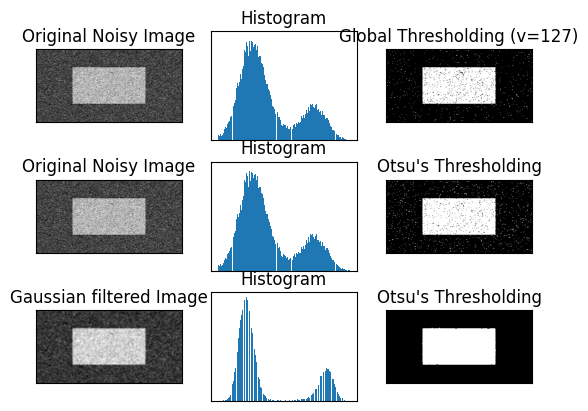

In [3]:
import cv2 as cv 
import numpy as np 
from matplotlib import pyplot as plt 
img = cv.imread('noisy2.png',0) 
# global thresholding 
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY) 
# Otsu's thresholding 
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU) 
# Otsu's thresholding after Gaussian filtering 
blur = cv.GaussianBlur(img,(5,5),0) 
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU) 
# plot all the images and their histograms 
images = [img, 0, th1, 
         img, 0, th2, 
         blur, 0, th3] 
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)', 
         'Original Noisy Image','Histogram',"Otsu's Thresholding", 
         'Gaussian filtered Image','Histogram',"Otsu's Thresholding"] 
for i in range(3): 
   plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray') 
   plt.title(titles[i*3]), plt.xticks([]), plt.yticks([]) 
   plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256) 
   plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([]) 
   plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray') 
   plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([]) 
plt.show() 